In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv('framingham.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
df.rename(columns={'TenYearCHD':'disease'},inplace=True)

In [7]:
df.head(20)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,disease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


<Axes: >

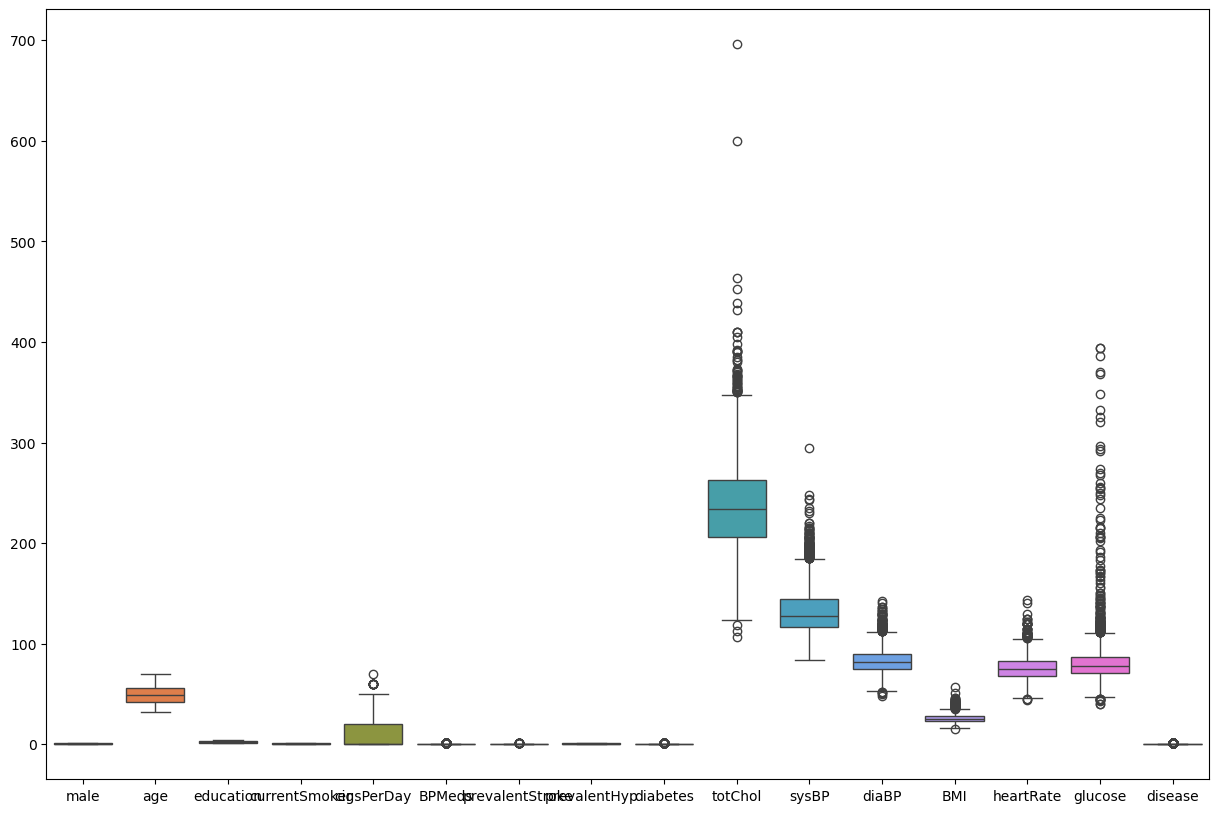

In [8]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,ax=ax)

In [9]:
iqr=df['BMI'].quantile(0.75)*df['BMI'].quantile(0.25)
low=df['BMI'].quantile(0.25)-1.5*iqr
upp=df['BMI'].quantile(0.75)+1.5*iqr
df1=df[(df['BMI']<upp)&(df['BMI']>low)]

<Axes: >

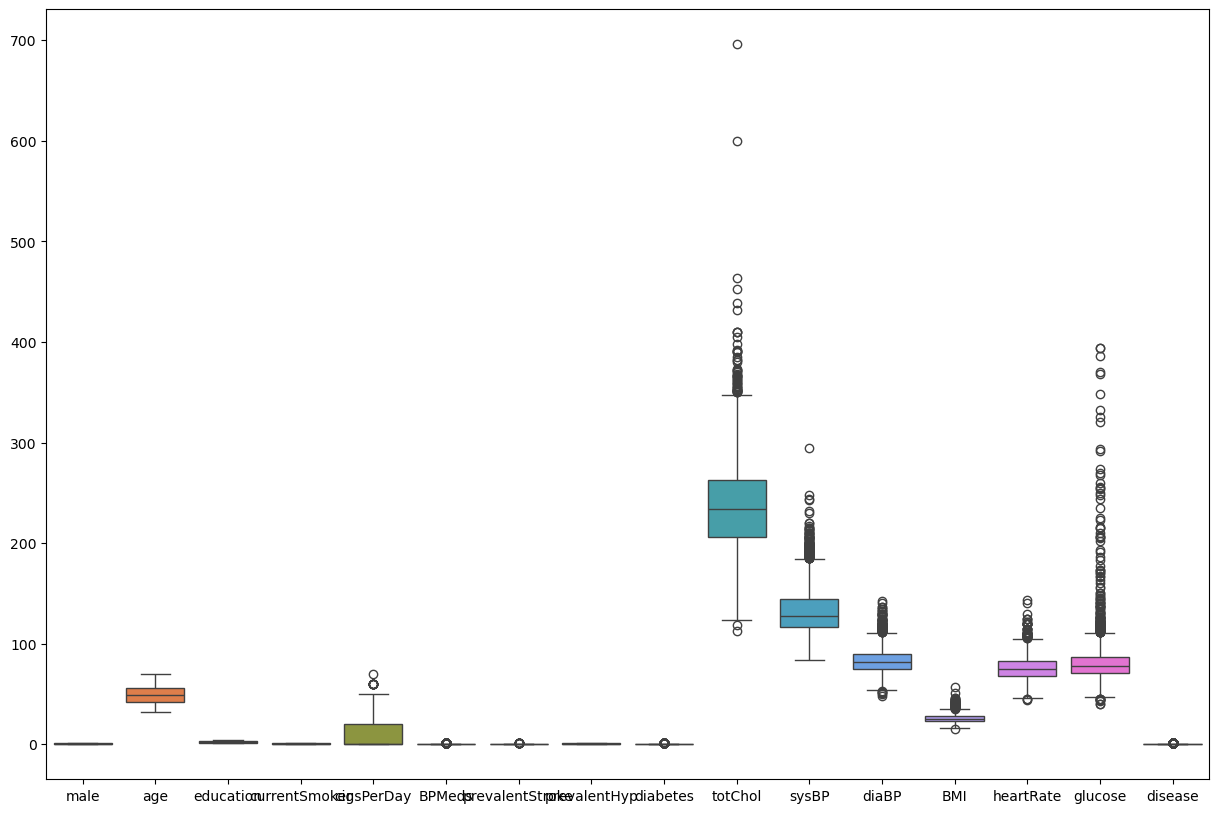

In [10]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df1,ax=ax)

In [11]:
iqr=df['totChol'].quantile(0.75)*df['totChol'].quantile(0.25)
low=df['totChol'].quantile(0.25)-1.5*iqr
upp=df['totChol'].quantile(0.75)+1.5*iqr
df1=df[(df['totChol']<upp)&(df['totChol']>low)]

In [12]:
iqr=df['glucose'].quantile(0.75)*df['glucose'].quantile(0.25)
low=df['glucose'].quantile(0.25)-1.5*iqr
upp=df['glucose'].quantile(0.75)+1.5*iqr
df1=df[(df['glucose']<upp)&(df['glucose']>low)]

In [13]:
iqr=df['heartRate'].quantile(0.75)*df['heartRate'].quantile(0.25)
low=df['heartRate'].quantile(0.25)-1.5*iqr
upp=df['heartRate'].quantile(0.75)+1.5*iqr
df1=df[(df['heartRate']<upp)&(df['heartRate']>low)]

In [14]:
iqr=df['sysBP'].quantile(0.75)*df['sysBP'].quantile(0.25)
low=df['sysBP'].quantile(0.25)-1.5*iqr
upp=df['sysBP'].quantile(0.75)+1.5*iqr
df1=df[(df['sysBP']<upp)&(df['sysBP']>low)]

In [15]:
iqr=df['diaBP'].quantile(0.75)*df['diaBP'].quantile(0.25)
low=df['diaBP'].quantile(0.25)-1.5*iqr
upp=df['diaBP'].quantile(0.75)+1.5*iqr
df1=df[(df['diaBP']<upp)&(df['diaBP']>low)]

<Axes: >

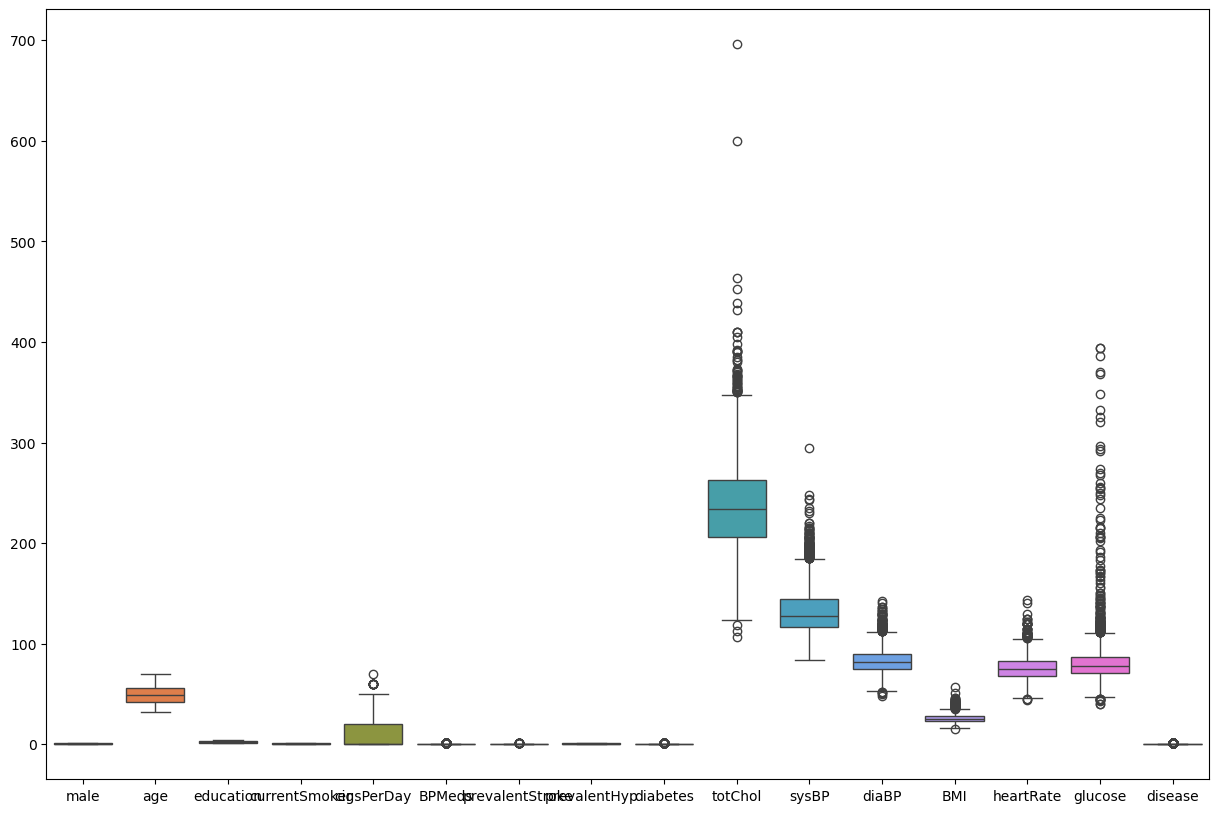

In [16]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df1,ax=ax)


In [17]:
df1.head(20)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,disease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [18]:
Q1 = df['glucose'].quantile(0.25)
Q3 = df['glucose'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
cleaned_data = df[(df['glucose'] >= lower_bound)]

<Axes: >

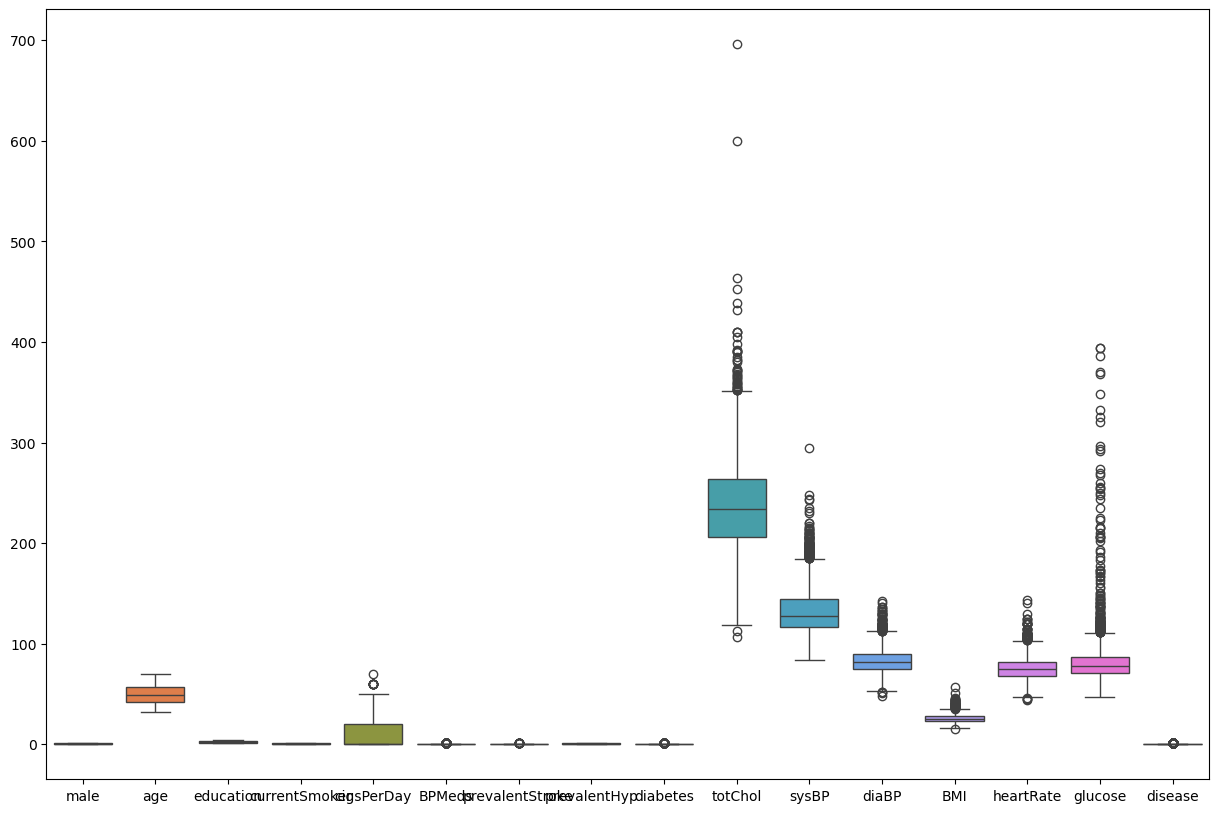

In [19]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=cleaned_data,ax=ax)


In [20]:
df['glucose']=df['glucose'].replace(lower_bound,df['glucose'].median())

<Axes: >

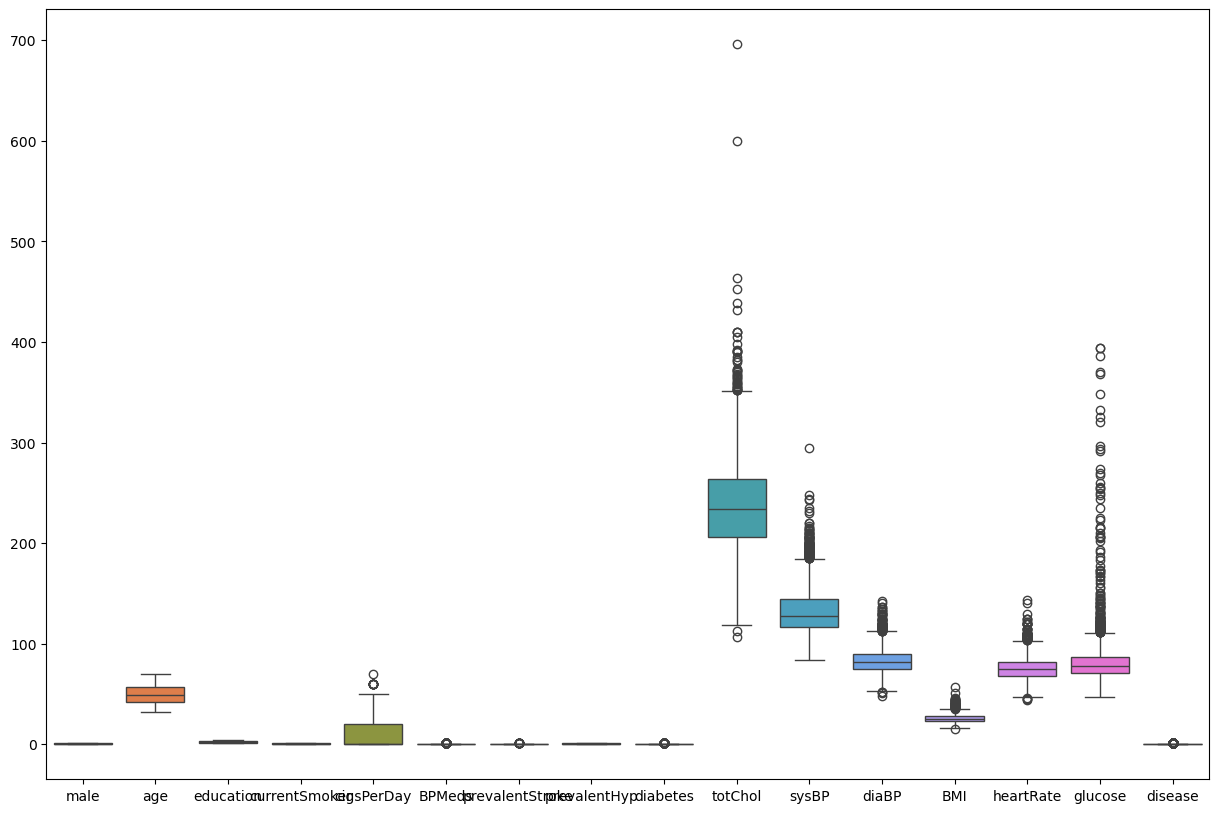

In [21]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=cleaned_data,ax=ax)


In [22]:
iqr=df['heartRate'].quantile(0.75)*df['heartRate'].quantile(0.25)
low=df['heartRate'].quantile(0.25)-1.5*iqr
upp=df['heartRate'].quantile(0.75)+1.5*iqr
print(low,upp)
# df1=df[(df['heartRate']<upp)&(df['heartRate']>low)]

-8398.0 8549.0


In [23]:
df.head(20)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,disease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [24]:
up=df['heartRate'].mean()+3*df['heartRate'].std()
lo=df['heartRate'].mean()-3*df['heartRate'].std()
print(up,lo)
df.loc[(df['glucose']>up)|(df['glucose']<lo)]

111.95871282165417 39.79913471197811


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,disease
22,0,52,1.0,0,0.0,0.0,0,0,0,234.0,148.0,78.0,34.17,70.0,113.0,0
37,1,52,1.0,0,0.0,0.0,0,1,1,178.0,160.0,98.0,40.11,75.0,225.0,0
44,0,53,3.0,0,0.0,1.0,0,1,1,311.0,206.0,92.0,21.51,76.0,215.0,1
66,0,62,1.0,0,0.0,0.0,0,1,1,212.0,190.0,99.0,29.64,100.0,202.0,0
96,0,63,4.0,1,20.0,0.0,0,0,1,239.0,134.0,80.0,26.64,88.0,126.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,0,63,2.0,0,0.0,0.0,0,1,0,250.0,190.0,88.0,24.16,94.0,118.0,1
4118,0,37,2.0,0,0.0,0.0,0,0,0,160.0,137.0,82.0,21.03,94.0,113.0,0
4203,1,63,1.0,1,10.0,0.0,0,0,1,240.0,146.0,84.0,30.48,75.0,120.0,0
4209,1,65,2.0,0,0.0,0.0,0,0,0,286.0,135.0,80.0,28.06,70.0,116.0,0


In [25]:
# trimming means deleting the outliers
# capping means changing the outliers according to the upper and lower limit
df.loc[df['glucose']>up,'glucose']=up
df.loc[df['glucose']<lo,'glucose']=lo



<Axes: >

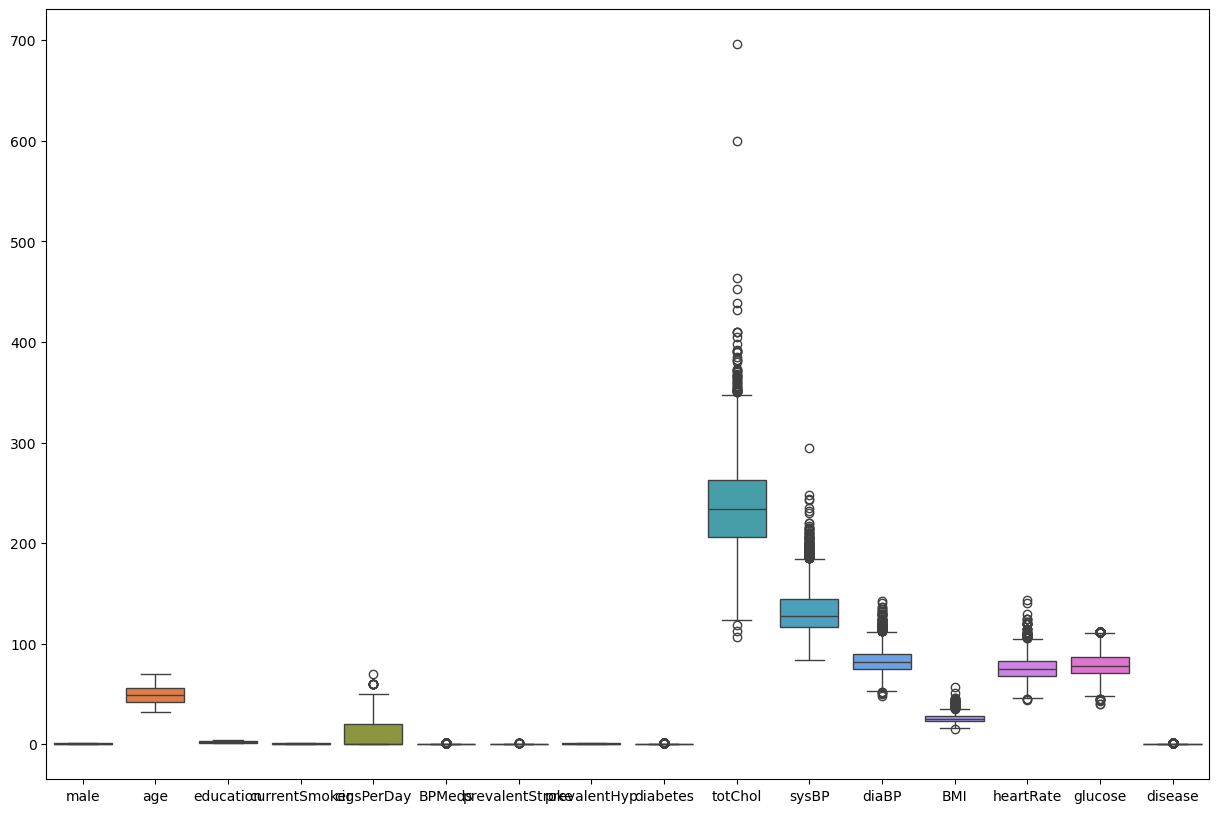

In [26]:


fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,ax=ax)


In [27]:
up=df['BMI'].mean()+3*df['BMI'].std()
lo=df['BMI'].mean()-3*df['BMI'].std()
df.loc[df['BMI']>up,'BMI']=up
df.loc[df['BMI']<lo,'BMI']=lo

In [28]:


up=df['totChol'].mean()+3*df['totChol'].std()
lo=df['totChol'].mean()-3*df['totChol'].std()
print(lo,up)
df.loc[df['totChol']>up,'totChol']=up
df.loc[df['totChol']<lo,'totChol']=lo


102.95058252608214 370.49258843857876


In [29]:


up=df['sysBP'].mean()+3*df['sysBP'].std()
lo=df['sysBP'].mean()-3*df['sysBP'].std()
df.loc[df['sysBP']>up,'sysBP']=up
df.loc[df['sysBP']<lo,'sysBP']=lo


In [30]:


up=df['diaBP'].mean()+3*df['diaBP'].std()
lo=df['diaBP'].mean()-3*df['diaBP'].std()
df.loc[df['diaBP']>up,'diaBP']=up
df.loc[df['diaBP']<lo,'diaBP']=lo


<Axes: >

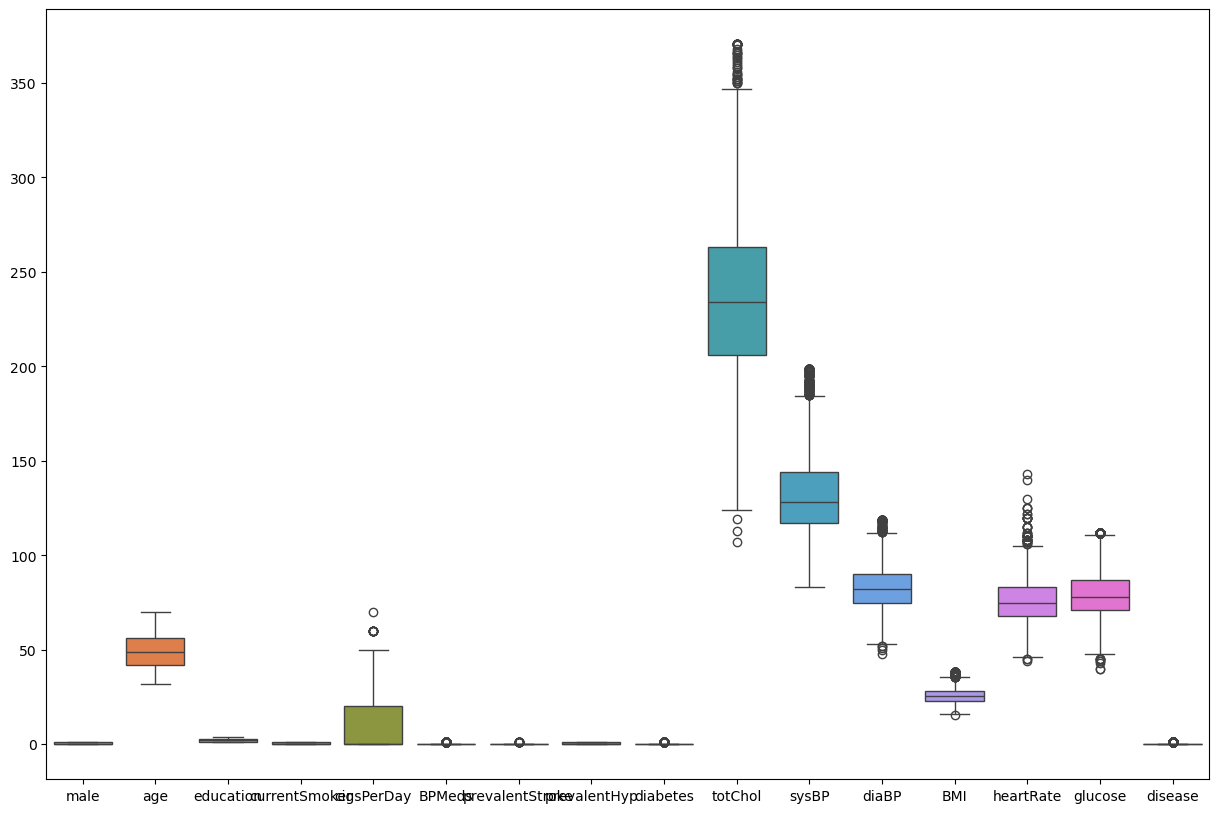

In [31]:


fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,ax=ax)


<Axes: ylabel='glucose'>

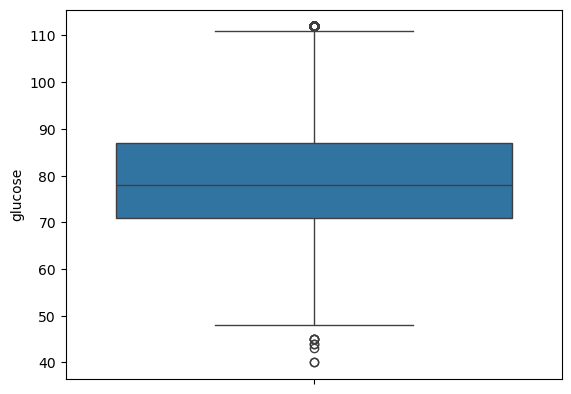

In [32]:
sns.boxplot(df['glucose'])

In [33]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,disease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,disease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


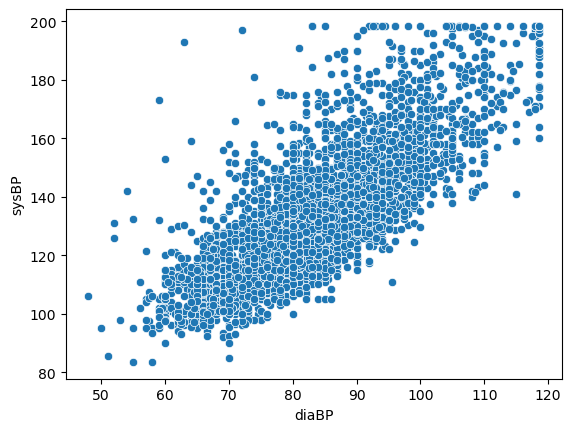

In [34]:
sns.scatterplot(x='diaBP',y='sysBP',data=df)
df.dropna()

In [35]:
df=pd.read_csv('framingham.csv')


In [36]:
df.head()
df.dropna()
df.rename(columns={'TenYearCHD':'disease'})

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,disease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [37]:
df1=df.dropna()

In [38]:
df1.head()
# df1.isnull().sum()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [39]:
X=df1.drop(columns='TenYearCHD')
y=df1['TenYearCHD']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [41]:
from sklearn.linear_model import LogisticRegression
lo=LogisticRegression()
lo.fit(X_train ,y_train)

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
pred=lo.predict(X_test)

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
print(mean_squared_error(pred,y_test))

0.1575492341356674


In [44]:
print(accuracy_score(y_test,pred))

0.8424507658643327
